In [29]:
import urllib.request
from PIL import Image
import os
import math

In [30]:
class GoogleMapsLayers:
  ROADMAP = "v"
  TERRAIN = "p"
  ALTERED_ROADMAP = "r"
  SATELLITE = "s"
  TERRAIN_ONLY = "t"
  HYBRID = "y"

In [39]:
lat = 41.426050
lng = -81.461400
zoom = 1
layer = GoogleMapsLayers.SATELLITE

# tiles
tile_size = 256
num_tiles = 1 << zoom    # => 2^zoom number of tiles

In [40]:
# getting x coordinate equivalent of the longitude:
point_x = int((tile_size / 2 + lng * tile_size / 360.0) * num_tiles // tile_size)

In [41]:
 # Convert the latitude to radians and take the sine
sin_y = math.sin(lat * (math.pi / 180.0))
# get y equivalent of the latitude
point_y = int(((tile_size / 2) + 0.5 * math.log((1 + sin_y) / (1 - sin_y)) * -(tile_size / (2 * math.pi))) * num_tiles // tile_size)

In [42]:
# start x and y for the top left tile coordinates
start_x = point_x
start_y = point_y

# sets the number of tiles composing the image:
tile_width = 5
tile_height = 5

# getting the pixel width and height for the entire tile composed image
width = tile_size * tile_width
height = tile_size * tile_width

# creating a new blank image with the desired pixel dimensions.  will be used to store the final image
map_img = Image.new('RGB', (width, height))

for x in range(0, tile_width):
    for y in range(0, tile_height):
        
        # creating google image request url:
        url = f'https://mt1.google.com/vt/lyrs={layer}&x={start_x + x}&y={start_y + y}&z={zoom}'
        
        # tile image file name:
        current_tile = f'{str(x)}-{str(y)}'
        
        # the tile image data is store into current_tile after url request
        urllib.request.urlretrieve(url, current_tile)
        
        # open that newly received image tile
        im = Image.open(current_tile)
        
        # paste that tile in its correct slot
        map_img.paste(im, (x * 256, y * 256))
        os.remove(current_tile)





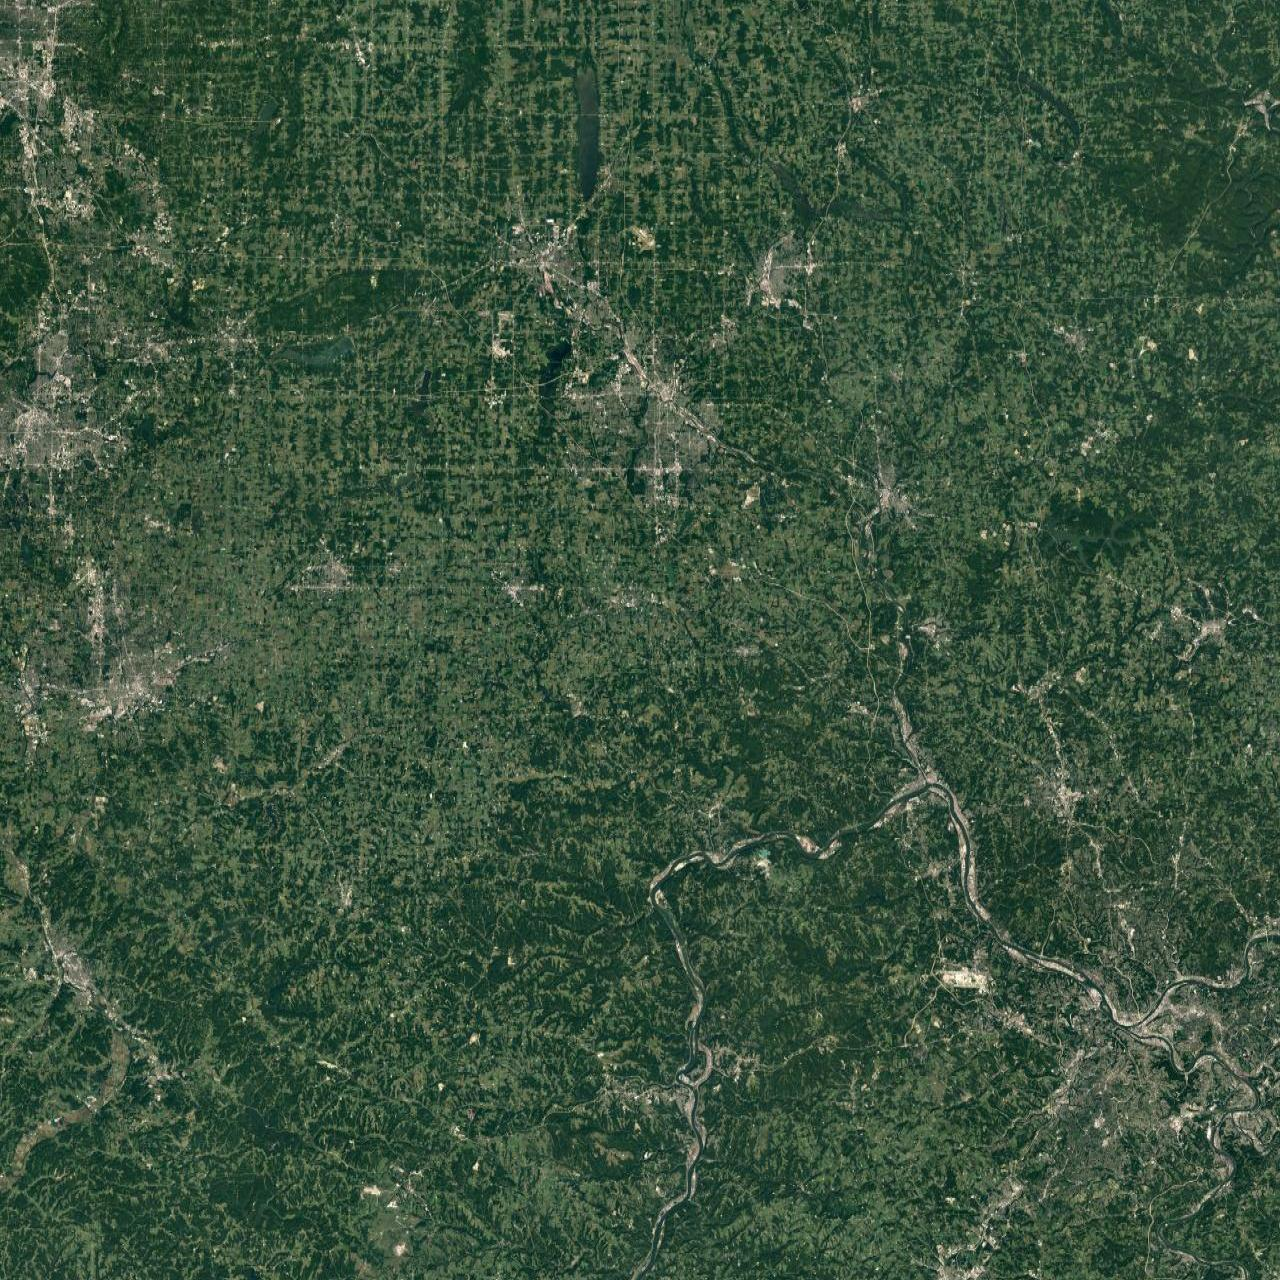

In [43]:
map_img

In [44]:
url

'https://mt1.google.com/vt/lyrs=s&x=284&y=386&z=10'